# Частина 1. Аналіз та підготовка даних

Імпортуємо дата сет:

In [ ]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1OPnEAT64Patnj_Ifhwn_pM1c15rsBNIoFrtz38A1_W4/export?format=csv'

data = pd.read_csv(url)
data.head(), data.dtypes

Проводимо огляд та попередню оцінку дата сету:

In [ ]:
descriptive_stats = data.describe()

variance_data = data[['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
                      'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                      'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']].var()
descriptive_stats, variance_data

Дивимось пропущені дані:



In [ ]:
missing_values = data.isnull().sum()
missing_values

Конвертуємо дані в колонках в потрібні типи:

In [18]:
# Convert 'Bedtime' and 'Wakeup time' to datetime format
data['Bedtime'] = pd.to_datetime(data['Bedtime'])
data['Wakeup time'] = pd.to_datetime(data['Wakeup time'])

# Convert binary categorical variables
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Smoking status'] = data['Smoking status'].map({'No': 0, 'Yes': 1})

Заповнюємо пропущені дані відповідними медіанами та знову перевіряємо чи все заповнено:

In [ ]:
# Fill missing values with the median for numeric columns
for column in ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']:
    data[column].fillna(data[column].median(), inplace=True)

data.isnull().sum(), data.head()

Візуалізуємо розподіли:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create histograms for the numeric columns to visualize distributions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# List of numeric columns for plotting
numeric_columns = ['Age', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage',
                   'Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
                   'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']

# Plotting each numeric column
for ax, column in zip(axes.flatten(), numeric_columns):
    sns.histplot(data[column], kde=True, ax=ax)
    ax.set_title(column + ' Distribution', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Show the plots
plt.show()

Будуємо таблицю кореляцій:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# **Частина 2. Моделювання**

Підготовка даних

In [22]:
from sklearn.model_selection import train_test_split

# Features and Target
X = data.drop(['ID', 'Bedtime', 'Wakeup time', 'Sleep efficiency'], axis=1)
y = data['Sleep efficiency']

# Encoding categorical data if not already done
X = pd.get_dummies(X, drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Вибір моделей та їх тренування

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Dictionary to store the evaluation metrics for each model
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    predictions = model.predict(X_test)  # Predict on the test set
    # Evaluate the predictions
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    # Store results
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Display the results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * 30)


Results for Linear Regression:
MAE: 0.0506
MSE: 0.0038
RMSE: 0.0619
R²: 0.7940
------------------------------
Results for Ridge Regression:
MAE: 0.0506
MSE: 0.0038
RMSE: 0.0620
R²: 0.7938
------------------------------
Results for Lasso Regression:
MAE: 0.0886
MSE: 0.0106
RMSE: 0.1032
R²: 0.4280
------------------------------
Results for Decision Tree Regression:
MAE: 0.0497
MSE: 0.0050
RMSE: 0.0707
R²: 0.7312
------------------------------
Results for Random Forest Regression:
MAE: 0.0365
MSE: 0.0026
RMSE: 0.0505
R²: 0.8628
------------------------------
Results for Support Vector Regression:
MAE: 0.0600
MSE: 0.0050
RMSE: 0.0707
R²: 0.7311
------------------------------
Results for Gradient Boosting Regression:
MAE: 0.0390
MSE: 0.0026
RMSE: 0.0507
R²: 0.8621
------------------------------


# **Частина 3. Аналіз результатів**

Створюємо графіки наявних та прогнозованих даних для подальшого аналізу

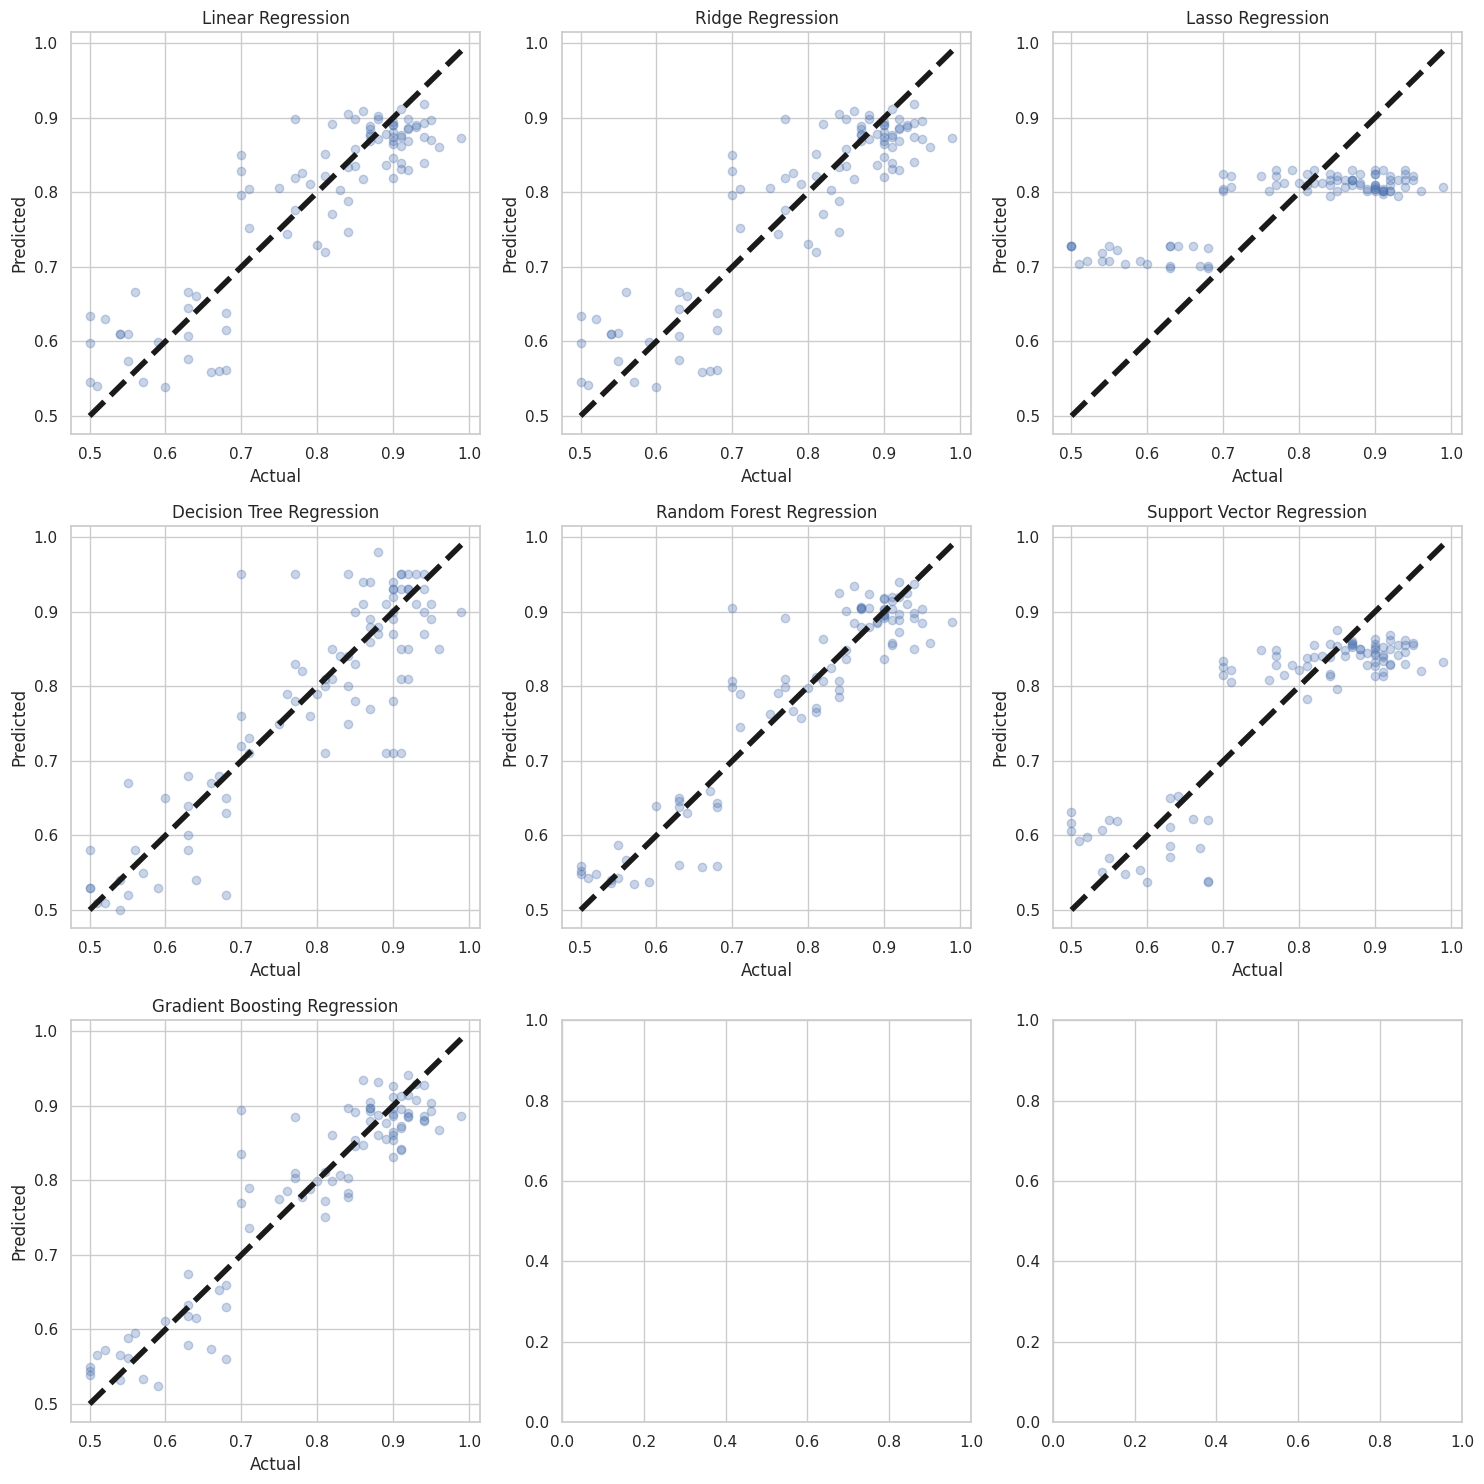

In [24]:
import matplotlib.pyplot as plt

# Plotting Actual vs. Predicted values for each model
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)  # Generate predictions
    ax.scatter(y_test, predictions, alpha=0.3)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()

Різниці між прогнозованими та фактичними значеннями відомі як **залишки**. Аналізуючи ці залишки, ми можемо виявити закономірності в помилках, які допускає кожна модель. Для початку необхідно вирахувати залишки та відобразити їх на графіках.

In [ ]:
import matplotlib.pyplot as plt

# Calculating residuals and plotting them for each model
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)
    residuals = y_test - predictions
    ax.scatter(y_test, residuals)
    ax.axhline(0, color='red', linestyle='--')
    ax.set_title(f'Residuals for {model_name}')
    ax.set_xlabel('Actual Sleep Efficiency')
    ax.set_ylabel('Residuals')

plt.tight_layout()
plt.show()


Діаграми залишків дають підказки про те, де кожна модель має тенденцію бути більш неточною. Ось детальний огляд конкретних випадків:


1.   **Лінійна регресія та ридж-регресія**

  Ці моделі здаються менш точними в окремих випадках, коли ефективність сну особливо висока (близько 1,0) або низька (близько 0,5). Існують конкретні точки, де прогнози значно вищі або нижчі за фактичні значення, що може вказувати на викиди або випадки, коли зв’язок між змінними та цільовим показником не є строго лінійним.

2.   **Регресія лассо**

  Ця модель показує постійну картину залишків, що свідчить про те, що вона бореться з екстремальними показниками ефективності сну. Вона занижує значення на нижньому рівні ефективності сну та завищує на вищому рівні. Це більш неправильно для прикладів на кінцях спектра ефективності, що вказує на погану відповідність для значень, які не близькі до середнього.

3.   **Регресія дерева рішень**

  Залишки моделі дерева рішень розкидані, але є помітні викиди, коли прогнози моделі значно відрізняються. Здається, він є менш точним у середньому діапазоні значень ефективності сну, без чіткої моделі, що вказує на систематичне зміщення, але потенційно страждає від високої дисперсії.

4.   **Регресія Random Forest**

  Хоча модель Random Forest загалом точніша, все ж є випадки, коли вона менш точна. Ці випадки розкидані в діапазоні значень ефективності сну, але, як правило, там, де ефективність сну вища. Цілком можливо, що ці екземпляри мають складні взаємодії між змінними, які модель не враховує повністю.

5. **Support Vector Regression**

  SVR демонструє тенденцію, що вона більш неточний у прогнозуванні як дуже високих, так і дуже низьких показників ефективності сну.

6. **Регресія з посиленням градієнта**
  
  Ця регресія також має розсіяні помилки в діапазоні ефективності, і є більш неточною у вищих значеннях ефективності.




**Висновки:**
Усі моделі, мають більше труднощів із викидами або випадками, які є незвичними порівняно з більшістю даних.
Нелінійні моделі, такі як Random Forest і Gradient Boosting, мають кращу обробку набору даних у цілому, але можуть мати проблеми з особливо складними екземплярами.
Лінійні моделі та ласо-регресія, які накладають лінійну структуру на зв’язки, швидше за все будуть помилковими на прикладах, де фактичні зв’язки є нелінійними.
Ефективність SVR вказує на те, що він може бути непридатним для поточного простору функцій або може вимагати подальшого налаштування його гіперпараметрів для адаптації до діапазону цільової змінної.

